### Importação dos dados



In [8]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [26]:
# Adicionando a coluna de faturamento
loja['Faturamento'] = loja['Preço']
loja2['Faturamento'] = loja2['Preço']
loja3['Faturamento'] = loja3['Preço']
loja4['Faturamento'] = loja4['Preço']

# Unindo os dados
todas_as_lojas = pd.concat([loja, loja2, loja3, loja4])

# Faturamento total
faturamento_total = todas_as_lojas['Faturamento'].sum()
print(f"Faturamento total: R$ {faturamento_total:,.2f}")

print("Faturamento por loja:")
print(f"Loja 1: R$ {loja['Faturamento'].sum():,.2f}")
print(f"Loja 2: R$ {loja2['Faturamento'].sum():,.2f}")
print(f"Loja 3: R$ {loja3['Faturamento'].sum():,.2f}")
print(f"Loja 4: R$ {loja4['Faturamento'].sum():,.2f}")


Faturamento total: R$ 5,871,490.79
Faturamento por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


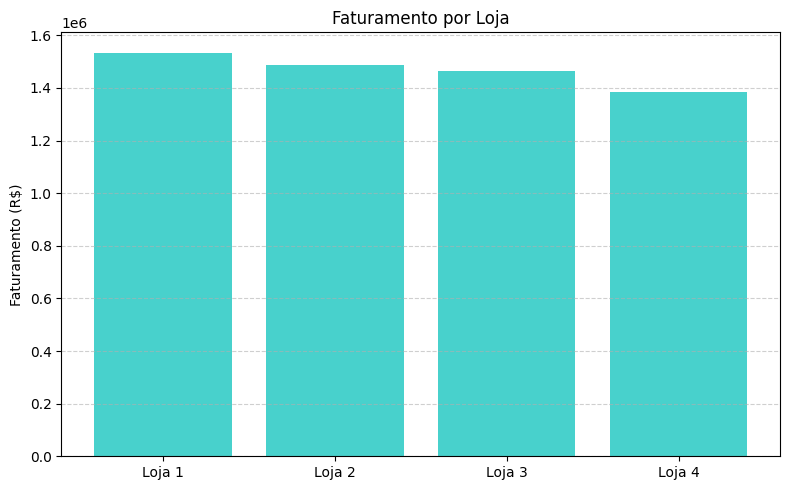

In [24]:
# Dicionário com os valores
faturamento_lojas = {
    'Loja 1': loja['Faturamento'].sum(),
    'Loja 2': loja2['Faturamento'].sum(),
    'Loja 3': loja3['Faturamento'].sum(),
    'Loja 4': loja4['Faturamento'].sum()
}

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(faturamento_lojas.keys(), faturamento_lojas.values(), color='mediumturquoise')
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [33]:
# Contagem de vendas por loja e categoria
vendas_por_categoria_loja = todas_as_lojas.groupby(['Categoria do Produto']).size().reset_index(name='Vendas')

print(vendas_por_categoria_loja)

    Categoria do Produto  Vendas
0             brinquedos    1290
1       eletrodomesticos    1149
2            eletronicos    1772
3        esporte e lazer    1113
4  instrumentos musicais     753
5                 livros     742
6                 moveis    1886
7  utilidades domesticas     730


In [34]:
faturamento_por_categoria_loja = todas_as_lojas.groupby(['Categoria do Produto'])['Preço'].sum().reset_index(name='Faturamento')

print(faturamento_por_categoria_loja)

    Categoria do Produto  Faturamento
0             brinquedos     98140.86
1       eletrodomesticos   1766337.03
2            eletronicos   2214099.72
3        esporte e lazer    190635.39
4  instrumentos musicais    465029.67
5                 livros     50260.74
6                 moveis   1010214.00
7  utilidades domesticas     76773.38


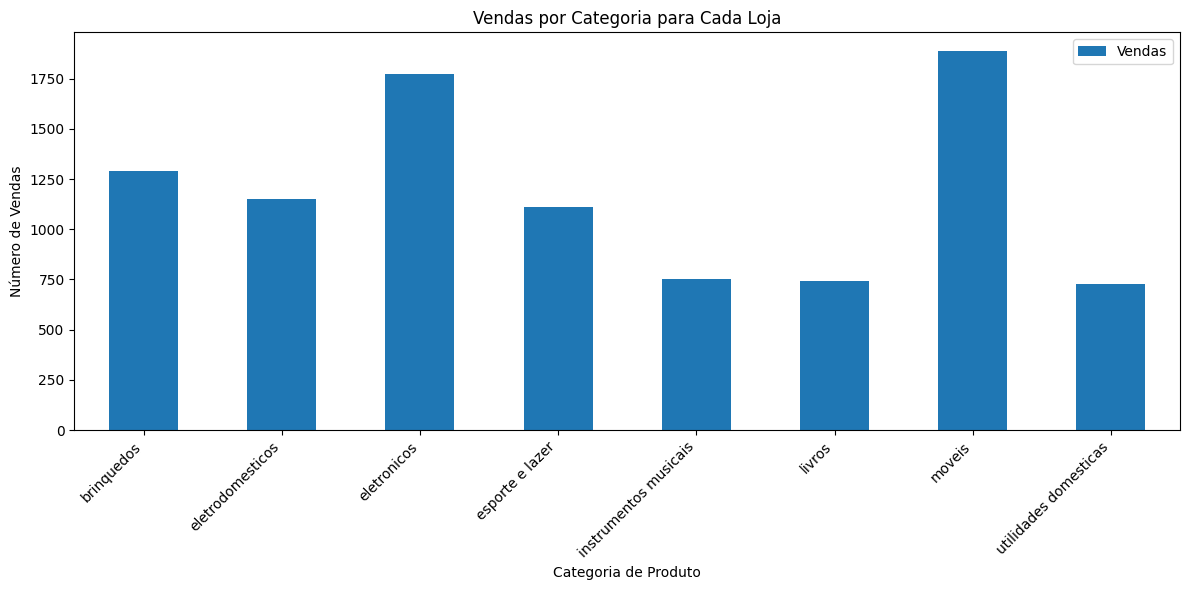

In [36]:
# Plotando o gráfico de vendas por categoria para cada loja
plt.figure(figsize=(12, 6))
vendas_por_categoria_loja.pivot_table(index='Categoria do Produto', values='Vendas', aggfunc='sum').plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Vendas por Categoria para Cada Loja')
plt.xlabel('Categoria de Produto')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [12]:
print("Média de avaliação por loja:")
print("Loja 1:", loja['Avaliação da compra'].mean())
print("Loja 2:", loja2['Avaliação da compra'].mean())
print("Loja 3:", loja3['Avaliação da compra'].mean())
print("Loja 4:", loja4['Avaliação da compra'].mean())


Média de avaliação por loja:
Loja 1: 3.976685036032217
Loja 2: 4.037303942348453
Loja 3: 4.048325561678677
Loja 4: 3.9957591178965224


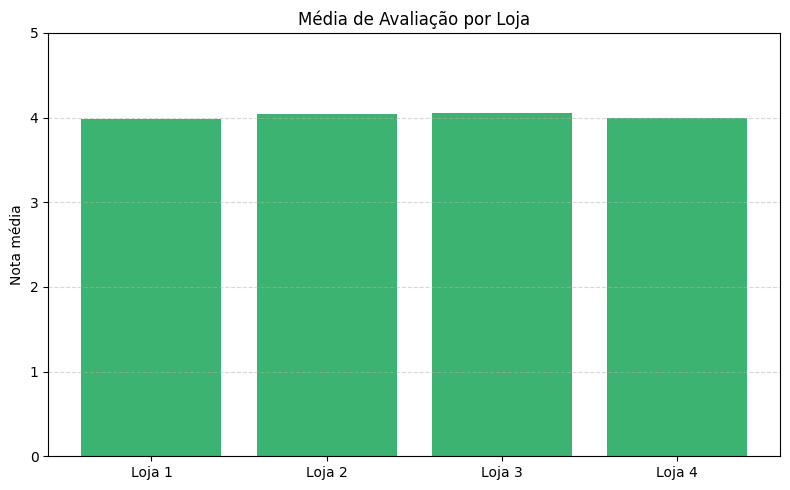

In [13]:
import matplotlib.pyplot as plt

# Dicionário com as médias
avaliacoes = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(avaliacoes.keys(), avaliacoes.values(), color='mediumseagreen')
plt.title('Média de Avaliação por Loja')
plt.ylabel('Nota média')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [14]:
vendas_por_produto = todas_as_lojas['Produto'].value_counts()

In [15]:
print("Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

Top 10 produtos mais vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64


In [16]:
print("10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

10 produtos menos vendidos:
Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


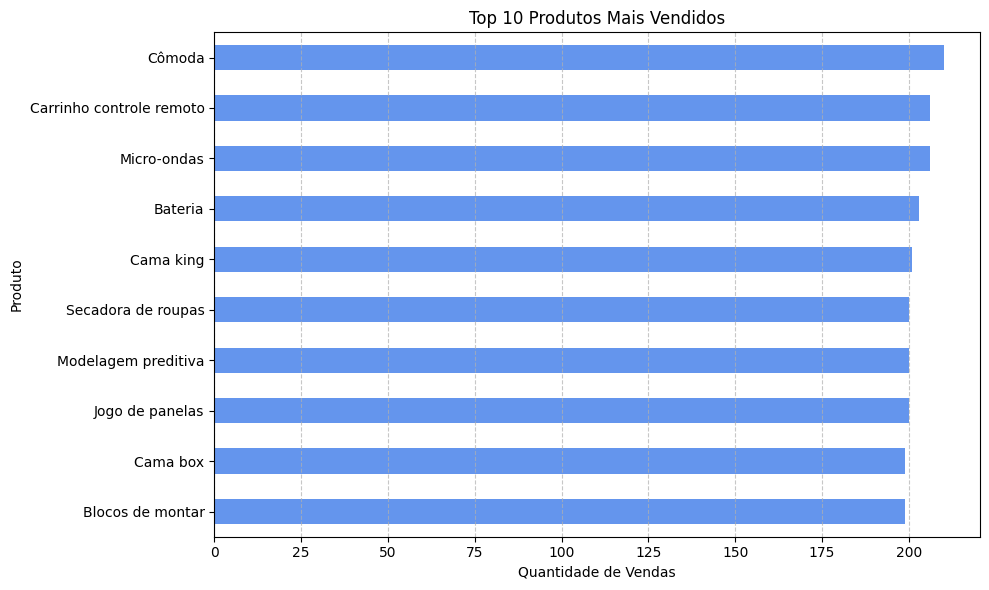

In [17]:

# Selecionando os 10 mais vendidos
top10_produtos = vendas_por_produto.head(10)

plt.figure(figsize=(10, 6))
top10_produtos.plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')
plt.gca().invert_yaxis()  # Deixa o mais vendido no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

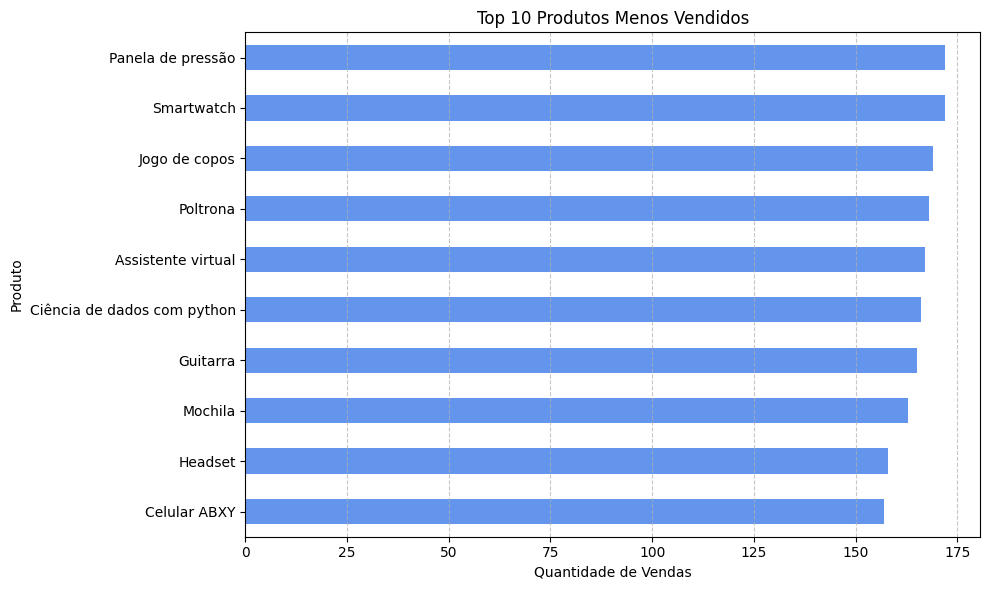

In [18]:
# Selecionando os 10 menos vendidos
top10_produtos = vendas_por_produto.tail(10)

plt.figure(figsize=(10, 6))
top10_produtos.plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Produtos Menos Vendidos')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produto')
plt.gca().invert_yaxis()  # Deixa o menos vendido no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [19]:
print("Frete médio por loja:")
print("Loja 1:", loja['Frete'].mean())
print("Loja 2:", loja2['Frete'].mean())
print("Loja 3:", loja3['Frete'].mean())
print("Loja 4:", loja4['Frete'].mean())

Frete médio por loja:
Loja 1: 34.69180491551149
Loja 2: 33.62194065817927
Loja 3: 33.07446427411743
Loja 4: 31.278997081841727


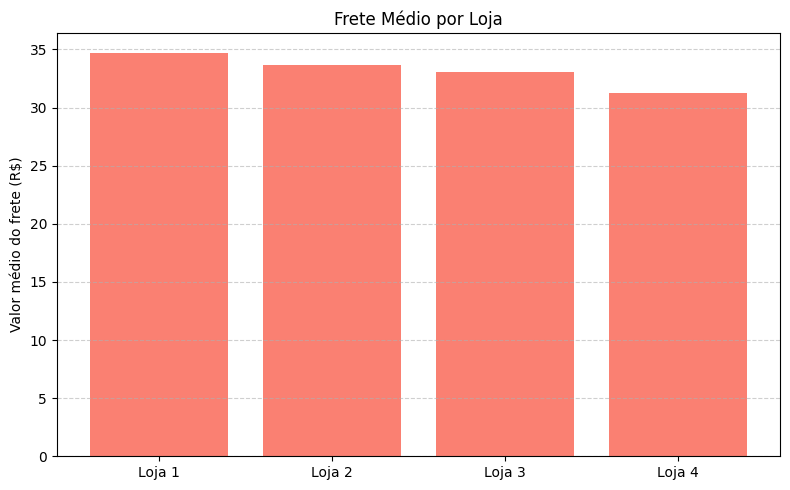

In [20]:
# Dicionário com os valores médios
frete_medio = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(frete_medio.keys(), frete_medio.values(), color='salmon')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor médio do frete (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Relatório de Desempenho de Vendas
Com base nos dados analisados, a loja que apresenta o menor desempenho em termos de faturamento é a Loja 4. A seguir, algumas recomendações para melhorar o desempenho dessa loja.

## Conclusão
A Loja 4 tem o menor faturamento, indicando que há possbilidade de venda para o futuro investimento.
